The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

train-images-idx3-ubyte.gz:  training set images (9912422 bytes)

train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)

t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)

t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [0]:
# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = datasets.fetch_mldata("MNIST Original")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


Once, the dataset is downloaded we will save the images of the digits in a numpy array features and the corresponding labels i.e. the digit in another numpy array labels as shown below –

In [0]:
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

Next, we calculate the HOG features for each image in the database and save them in another numpy array named hog_feature.

In [0]:
list_hog_fd = []
for features in features:
  fd = hog(features.reshape((28, 28)), orientations=9, pixels_per_cell = (14, 14), cells_per_block=(1,1), visualize=False)
  list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

To calculate the HOG features, we set the number of cells in each block equal to one and each individual cell is of size 14×14. Since our image is of size 28×28, we will have four blocks/cells of size 14×14 each. Also, we set the size of orientation vector equal to 9. So our HOG feature vector for each sample will be of size 4×9 = 36. We are not interesting in visualizing the HOG feature image, so we will set the visualise parameter to false.

In [0]:
clf = LinearSVC()

We preform the training using the fit member function of the clf object.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hog_features, labels)
# clf.fit(hog_features, labels)
clf.fit(x_train, y_train)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
predict = clf.predict(x_test)
print(predict[:50])
print(y_test[:50])

[4 3 3 1 2 9 2 4 3 1 7 8 8 1 8 0 9 1 1 8 0 7 8 4 7 0 7 1 7 1 6 8 4 7 7 9 6
 6 0 6 1 4 0 8 2 7 7 5 7 0]
[4 3 3 1 2 9 2 4 9 1 7 8 9 1 8 0 9 1 1 8 0 7 8 4 7 0 7 1 7 1 9 8 7 7 7 7 8
 6 0 0 1 4 0 8 2 7 7 5 7 0]


### Save Model

In [13]:
# When the training finishes, we will save the classifier in a file named digits_cls.pkl as shown in the code below -
joblib.dump(clf, "digits_cls.pkl", compress=3)

"""
compress: integer for 0 to 9, optional
Optional compression level for the data. 0 is no compression. Higher means more compression, but also slower read and write times. Using a value of 3 is often a good compromise.
"""

'\ncompress: integer for 0 to 9, optional\nOptional compression level for the data. 0 is no compression. Higher means more compression, but also slower read and write times. Using a value of 3 is often a good compromise.\n'

In [14]:
# To authenticate Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Testing the Classifier

In [0]:
import cv2

# Load the classifier
classifier = joblib.load("digits_cls.pkl")

image_path = '/content/drive/My Drive/vijaya_bank/photo_1.jpg'


# Read the input image
im = cv2.imread(image_path)

# Convert the image to Gray Scale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]


All the pixel locations with grayscale values greater than 90 are set to 0 in the binary image and all the pixel locations with grayscale values less than 90 are set to 255 in the binary image

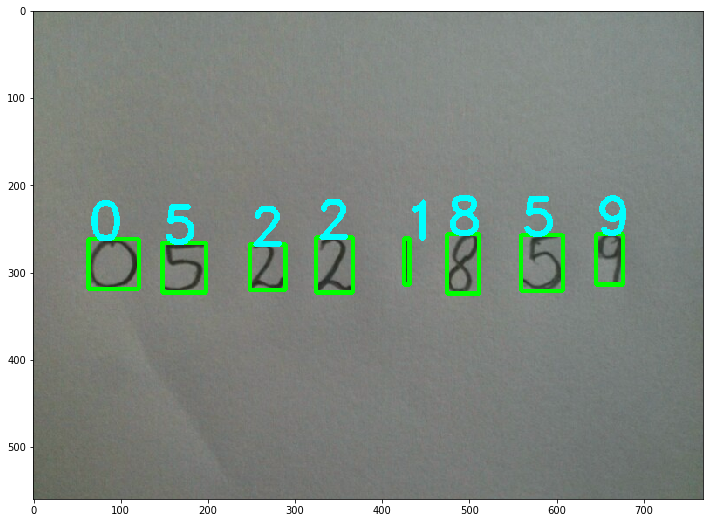

In [21]:
import warnings
warnings.filterwarnings('ignore')

for rect in rects:
  # Draw the rectangles
  cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
  leng = int(rect[3] * 1.6)
  pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
  pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
  roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
  # resize the image
  roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
  roi = cv2.dilate(roi, (3, 3))
  # Calculate the HOG features
  roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
  nbr = classifier.predict(np.array([roi_hog_fd], 'float64'))
  cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
  
plt.figure(figsize=(12, 12))
plt.imshow(im)